In [ ]:
import pandas as pd

In [ ]:
import torch
import cv2
import pickle
import os
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/CSS2")


source_file = '/content/drive/My Drive/kaggle.json'
destination_dir = '/root/.kaggle/'
destination_file = os.path.join(destination_dir, 'kaggle.json')

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the file
shutil.copy(source_file, destination_file)


Mounted at /content/drive


'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# loading detection data
voc_dataset_train = torchvision.datasets.VOCDetection(root="/content/drive/My Drive/CSS2",
                                                image_set="train",

                                                year="2007")
voc_dataset_val = torchvision.datasets.VOCDetection(root="/content/drive/My Drive/CSS2",
                                                image_set="val",

                                                year="2007")


In [ ]:
voc_dataset_train[0]

(<PIL.Image.Image image mode=RGB size=500x333>,
 {'annotation': {'folder': 'VOC2007',
   'filename': '000012.jpg',
   'source': {'database': 'The VOC2007 Database',
    'annotation': 'PASCAL VOC2007',
    'image': 'flickr',
    'flickrid': '207539885'},
   'owner': {'flickrid': 'KevBow', 'name': '?'},
   'size': {'width': '500', 'height': '333', 'depth': '3'},
   'segmented': '0',
   'object': [{'name': 'car',
     'pose': 'Rear',
     'truncated': '0',
     'difficult': '0',
     'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}]}})

In [ ]:
unique_class_labels = ['car', 'person', 'train', 'bus', 'bicycle', 'motorbike']


In [ ]:
'''
label_2_idx = {'person': 1,
               'motorbike': 2, 'train': 3,
               'bus': 4, 'bicycle': 5,
               'car': 6, 'bg': 0}
idx_2_label = {1: 'person',
               2: 'motorbike', 3: 'train',
               4: 'bus', 5: 'bicycle',
               6: 'car', 0: 'bg'}
'''
label_2_idx = {'pottedplant': 1, 'person': 2,
               'motorbike': 3, 'train': 4,
               'dog': 5, 'diningtable': 6,
               'horse': 7, 'bus': 8,
               'aeroplane': 9, 'sofa': 10,
               'sheep': 11, 'tvmonitor': 12,
               'bird': 13, 'bottle': 14,
               'chair': 15, 'cat': 16,
               'bicycle': 17, 'cow': 18,
               'boat': 19, 'car': 20, 'bg': 0}
idx_2_label = {1: 'pottedplant', 2: 'person',
               3: 'motorbike', 4: 'train',
               5: 'dog', 6: 'diningtable',
               7: 'horse', 8: 'bus',
               9: 'aeroplane', 10: 'sofa',
               11: 'sheep', 12: 'tvmonitor',
               13: 'bird', 14: 'bottle',
               15: 'chair', 16: 'cat',
               17: 'bicycle', 18: 'cow',
               19: 'boat', 20: 'car', 0: 'bg'}

In [ ]:
from tqdm import tqdm

target_labels = ['car', 'person', 'train', 'bus', 'bicycle', 'motorbike']

# Initialize tqdm with the total number of iterations
progress_bar = tqdm(total=len(voc_dataset_train), desc="Processing dataset", ncols=100)

# Filter the dataset to include only samples with the desired labels
filtered_voc_dataset_train = []
for image, target in voc_dataset_train:
    objects = target['annotation']['object']
    labels = [obj['name'] for obj in objects]
    if any(label in target_labels for label in labels):
        filtered_voc_dataset_train.append((image, target))

    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Print the number of samples in the filtered dataset
print("Number of samples in the filtered dataset:", len(filtered_voc_dataset_train))


Processing dataset: 100%|███████████████████████████████████████| 2501/2501 [23:51<00:00,  1.75it/s]

Number of samples in the filtered dataset: 1514


In [ ]:
print("Number of samples in the filtered dataset:", len(filtered_voc_dataset_train))


Number of samples in the filtered dataset: 1514


In [ ]:
import pickle

# Define the filename to save the filtered dataset
filename = '/content/drive/MyDrive/CSS2/filtered_voc_dataset_train.pkl'

# Save the filtered dataset to a file
with open(filename, 'wb') as file:
    pickle.dump(filtered_voc_dataset_train, file)


In [ ]:
from tqdm import tqdm

target_labels = ['car', 'person', 'train', 'bus', 'bicycle', 'motorbike']

# Initialize tqdm with the total number of iterations
progress_bar = tqdm(total=len(voc_dataset_val), desc="Processing dataset", ncols=100)

# Filter the dataset to include only samples with the desired labels
filtered_voc_dataset_val = []
for image, target in voc_dataset_val:
    objects = target['annotation']['object']
    labels = [obj['name'] for obj in objects]
    if any(label in target_labels for label in labels):
        filtered_voc_dataset_val.append((image, target))

    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Print the number of samples in the filtered dataset
print("Number of samples in the filtered dataset:", len(filtered_voc_dataset_val))


Processing dataset: 100%|███████████████████████████████████████| 2510/2510 [22:13<00:00,  1.88it/s]

Number of samples in the filtered dataset: 1457


In [ ]:
import pickle

# Define the filename to save the filtered dataset
filename = '/content/drive/MyDrive/CSS2/filtered_voc_dataset_val.pkl'

# Save the filtered dataset to a file
with open(filename, 'wb') as file:
    pickle.dump(filtered_voc_dataset_val, file)


In [ ]:
# LOAD PICKLE FILTERED DATASET
import pickle

# Define the filename where the filtered dataset is saved
filename = '/content/drive/MyDrive/CSS2/filtered_voc_dataset_train.pkl'

# Load the filtered dataset from the file
with open(filename, 'rb') as file:
    filtered_voc_dataset_train = pickle.load(file)

# Define the filename where the filtered dataset is saved
filename = '/content/drive/MyDrive/CSS2/filtered_voc_dataset_val.pkl'

# Load the filtered dataset from the file
with open(filename, 'rb') as file:
    filtered_voc_dataset_val = pickle.load(file)


In [ ]:
len(filtered_voc_dataset_val)

1457

In [ ]:
# boxes: [[xmin, y_min, x_max, y_max]]
# labels: labels present in bounding boxes
# scores: array of probabilities that given object is present in bounding boxes.
# class_map: dictionary that maps index to class names
def draw_boxes(img, boxes, scores, labels, class_map=None):
    nums = len(boxes)
    for i in range(nums):
        x1y1 = tuple((np.array(boxes[i][0:2])).astype(np.int32))
        x2y2 = tuple((np.array(boxes[i][2:4])).astype(np.int32))
        img = cv2.rectangle(img, x1y1, x2y2, (255, 0, 0), 2)
        label = int(labels[i])
        if class_map is not None:
            label_txt = class_map[label]
        else:
            label_txt = str(label)
        img = cv2.putText(
            img,
            "{} {:.4f}".format(label_txt, scores[i]),
            x1y1,
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            1,
            (0, 0, 255),
            2,
        )
    return img

In [ ]:
sample_image, sample_annot = filtered_voc_dataset_train[0]
sample_image = np.array(sample_image)
sample_annot = sample_annot["annotation"]["object"]
boxes = [[int(v) for k, v in x["bndbox"].items()] for x in sample_annot]
labels = [label_2_idx[x["name"]] for x in sample_annot]
scores = [1]*len(labels)
final_image = draw_boxes(sample_image, boxes, scores, labels, idx_2_label)
plt.imshow(final_image)
plt.show()

NameError: name 'filtered_voc_dataset_train' is not defined

In [ ]:
def calculate_iou_score(box_1, box_2):
    '''
        box_1 = single of ground truth bounding boxes
        box_2 = single of predicted bounded boxes
    '''
    box_1_x1 = box_1[0]
    box_1_y1 = box_1[1]
    box_1_x2 = box_1[2]
    box_1_y2 = box_1[3]

    box_2_x1 = box_2[0]
    box_2_y1 = box_2[1]
    box_2_x2 = box_2[2]
    box_2_y2 = box_2[3]

    x1 = np.maximum(box_1_x1, box_2_x1)
    y1 = np.maximum(box_1_y1, box_2_y1)
    x2 = np.minimum(box_1_x2, box_2_x2)
    y2 = np.minimum(box_1_y2, box_2_y2)

    area_of_intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box_1 = (box_1_x2 - box_1_x1 + 1) * (box_1_y2 - box_1_y1 + 1)
    area_box_2 = (box_2_x2 - box_2_x1 + 1) * (box_2_y2 - box_2_y1 + 1)
    area_of_union = area_box_1 + area_box_2 - area_of_intersection

    return area_of_intersection/float(area_of_union)

In [ ]:
def process_data_for_rcnn(image, rects, class_map, boxes_annots, iou_threshold, max_boxes):
    true_classes = []
    image_sections = []
    true_count = 0
    false_count = 0
    for annot in boxes_annots:
        label = annot["name"]
        box = [int(c) for _, c in annot["bndbox"].items()]
        box = np.array(box)
        for rect in rects:
            iou_score = calculate_iou_score(rect, box)
            if iou_score > iou_threshold:
                if true_count < max_boxes//2:
                    true_classes.append(class_map[label])
                    x1, y1, x2, y2 = rect
                    img_section = image[y1: y2, x1: x2]
                    image_sections.append(img_section)
                    true_count += 1
            else:
                if false_count < max_boxes//2:
                    true_classes.append(0)
                    x1, y1, x2, y2 = rect
                    img_section = image[y1: y2, x1: x2]
                    image_sections.append(img_section)
                    false_count += 1
    return image_sections, true_classes

In [ ]:
!kaggle datasets download -d tarunbisht11/rcnn-processed-pickle -p "/content/drive/My Drive/CSS2"

... resuming from 50331648 bytes (5163874233 bytes left) ...
100% 4.86G/4.86G [04:30<00:00, 23.7MB/s]
100% 4.86G/4.86G [04:30<00:00, 19.1MB/s]


In [ ]:
max_iou_threshold = 0.7
max_boxes = 50
max_selections = 1000
processed_data_save_path_train = "/content/drive/MyDrive/CSS2/rcnn-processed-pickle/rcnn_train/rcnn_train"
processed_data_save_path_val = "/content/drive/MyDrive/CSS2/rcnn-processed-pickle/rcnn_val/rcnn_val"
#os.makedirs(processed_data_save_path_train, exist_ok=True)
#os.makedirs(processed_data_save_path_val, exist_ok=True)

In [ ]:
all_images = []
all_labels = []
count = 0
if len(os.listdir(processed_data_save_path_train)) < 80000:
    for image, annot in tqdm(filtered_voc_dataset_train):
        image = np.array(image)
        boxes_annots = annot["annotation"]["object"]
        ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        rects = ss.process()[:max_selections]
        rects = np.array([[x, y, x+w, y+h] for x, y, w, h in rects])
        images, classes = process_data_for_rcnn(image,
                                                rects,
                                                label_2_idx,
                                                boxes_annots,
                                                max_iou_threshold,
                                                max_boxes)
        count += 1
        all_images += images
        all_labels += classes

    # saving processed data to pickle file
    test = 0
    for idx, (image, label) in enumerate(zip(all_images, all_labels)):
        if test % 100 == 0:
          print(test)
        with open(os.path.join(processed_data_save_path_train, f"img_{idx}.pkl"), "wb") as pkl:
            pickle.dump({"image": image, "label": label}, pkl)
            test += 1
    tqdm.close()
else:
    print("Data Already Prepared.")

100%|██████████| 1514/1514 [40:47<00:00,  1.62s/it]


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100


OSError: [Errno 5] Input/output error: '/content/drive/MyDrive/CSS2/rcnn-processed-pickle/rcnn_train/rcnn_train/img_5146.pkl'

In [ ]:
print(len(os.listdir(processed_data_save_path_val)))

45059


In [ ]:
all_images = []
all_labels = []
count = 0
if len(os.listdir(processed_data_save_path_val)) < 80000:
    for image, annot in tqdm(filtered_voc_dataset_val):
        image = np.array(image)
        boxes_annots = annot["annotation"]["object"]
        ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        rects = ss.process()[:max_selections]
        rects = np.array([[x, y, x+w, y+h] for x, y, w, h in rects])
        images, classes = process_data_for_rcnn(image,
                                                rects,
                                                label_2_idx,
                                                boxes_annots,
                                                max_iou_threshold,
                                                max_boxes)
        count += 1
        all_images += images
        all_labels += classes


    test = 0
    for idx, (image, label) in enumerate(zip(all_images, all_labels)):
        if test % 100 == 0:
          print(test)
        with open(os.path.join(processed_data_save_path_val, f"img_{idx}.pkl"), "wb") as pkl:
            pickle.dump({"image": image, "label": label}, pkl)
            test += 1
    tqdm.close()
else:
    print("Data Already Prepared.")

100%|██████████| 1457/1457 [39:22<00:00,  1.62s/it]


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
class RCNNDataset(torch.utils.data.Dataset):
    def __init__(self, processed_data_folder, section_dim=(224, 224)):
        self.section_dim = section_dim
        self.data_files = os.listdir(processed_data_folder)
        self.data_files = list(map(lambda x: os.path.join(processed_data_folder, x), self.data_files))
        self.preprocess = torchvision.transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])

    def __len__(self):
        return len(self.data_files)

    def __getitem__(self, idx):
        with open(self.data_files[idx], "rb") as pkl:
            data = pickle.load(pkl)
        image, label = data["image"], data["label"]
        image = cv2.resize(image, self.section_dim)
        image = np.asarray(image, dtype=np.float32)
        image = torch.from_numpy(image)
        image = torch.permute(image, (2, 0, 1))
        image = self.preprocess(image)
        label = torch.tensor(label)
        return image, label

In [ ]:
def imshow(inp, labels, num_rows=16, num_cols=4):
    """Display image for Tensor."""
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))
    axes = axes.ravel()
    mean = torch.tensor([0.485, 0.456, 0.406]).reshape(1, -1, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).reshape(1, -1, 1, 1)
    inp = std * inp + mean
    inp = inp.permute((0, 2, 3, 1))
    inp = inp.type(torch.uint8)
    for idx, ax in enumerate(axes):
        ax.imshow(inp[idx])
        ax.set_title(labels[idx])
        ax.grid(False)
        ax.set_axis_off()
    plt.show()

In [ ]:
train_dataset = RCNNDataset(processed_data_folder=processed_data_save_path_train, section_dim=(224, 224))
val_dataset = RCNNDataset(processed_data_folder=processed_data_save_path_val, section_dim=(224, 224))

OSError: [Errno 5] Input/output error: '/content/drive/MyDrive/CSS2/rcnn-processed-pickle/rcnn_val/rcnn_val'

In [ ]:
print("Train Dataset one sample images shape: ", train_dataset[0][0].shape)
print("Train Dataset one sample labels shape: ", train_dataset[0][1].shape)
print("Train Dataset one sample images dtype: ", train_dataset[0][0].dtype)
print("Train Dataset one sample labels dtype: ", train_dataset[0][1].dtype)
print("Train Dataset number of samples: ", len(train_dataset))

Train Dataset one sample images shape:  torch.Size([3, 224, 224])
Train Dataset one sample labels shape:  torch.Size([])
Train Dataset one sample images dtype:  torch.float32
Train Dataset one sample labels dtype:  torch.int64
Train Dataset number of samples:  47368


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

Train Batch


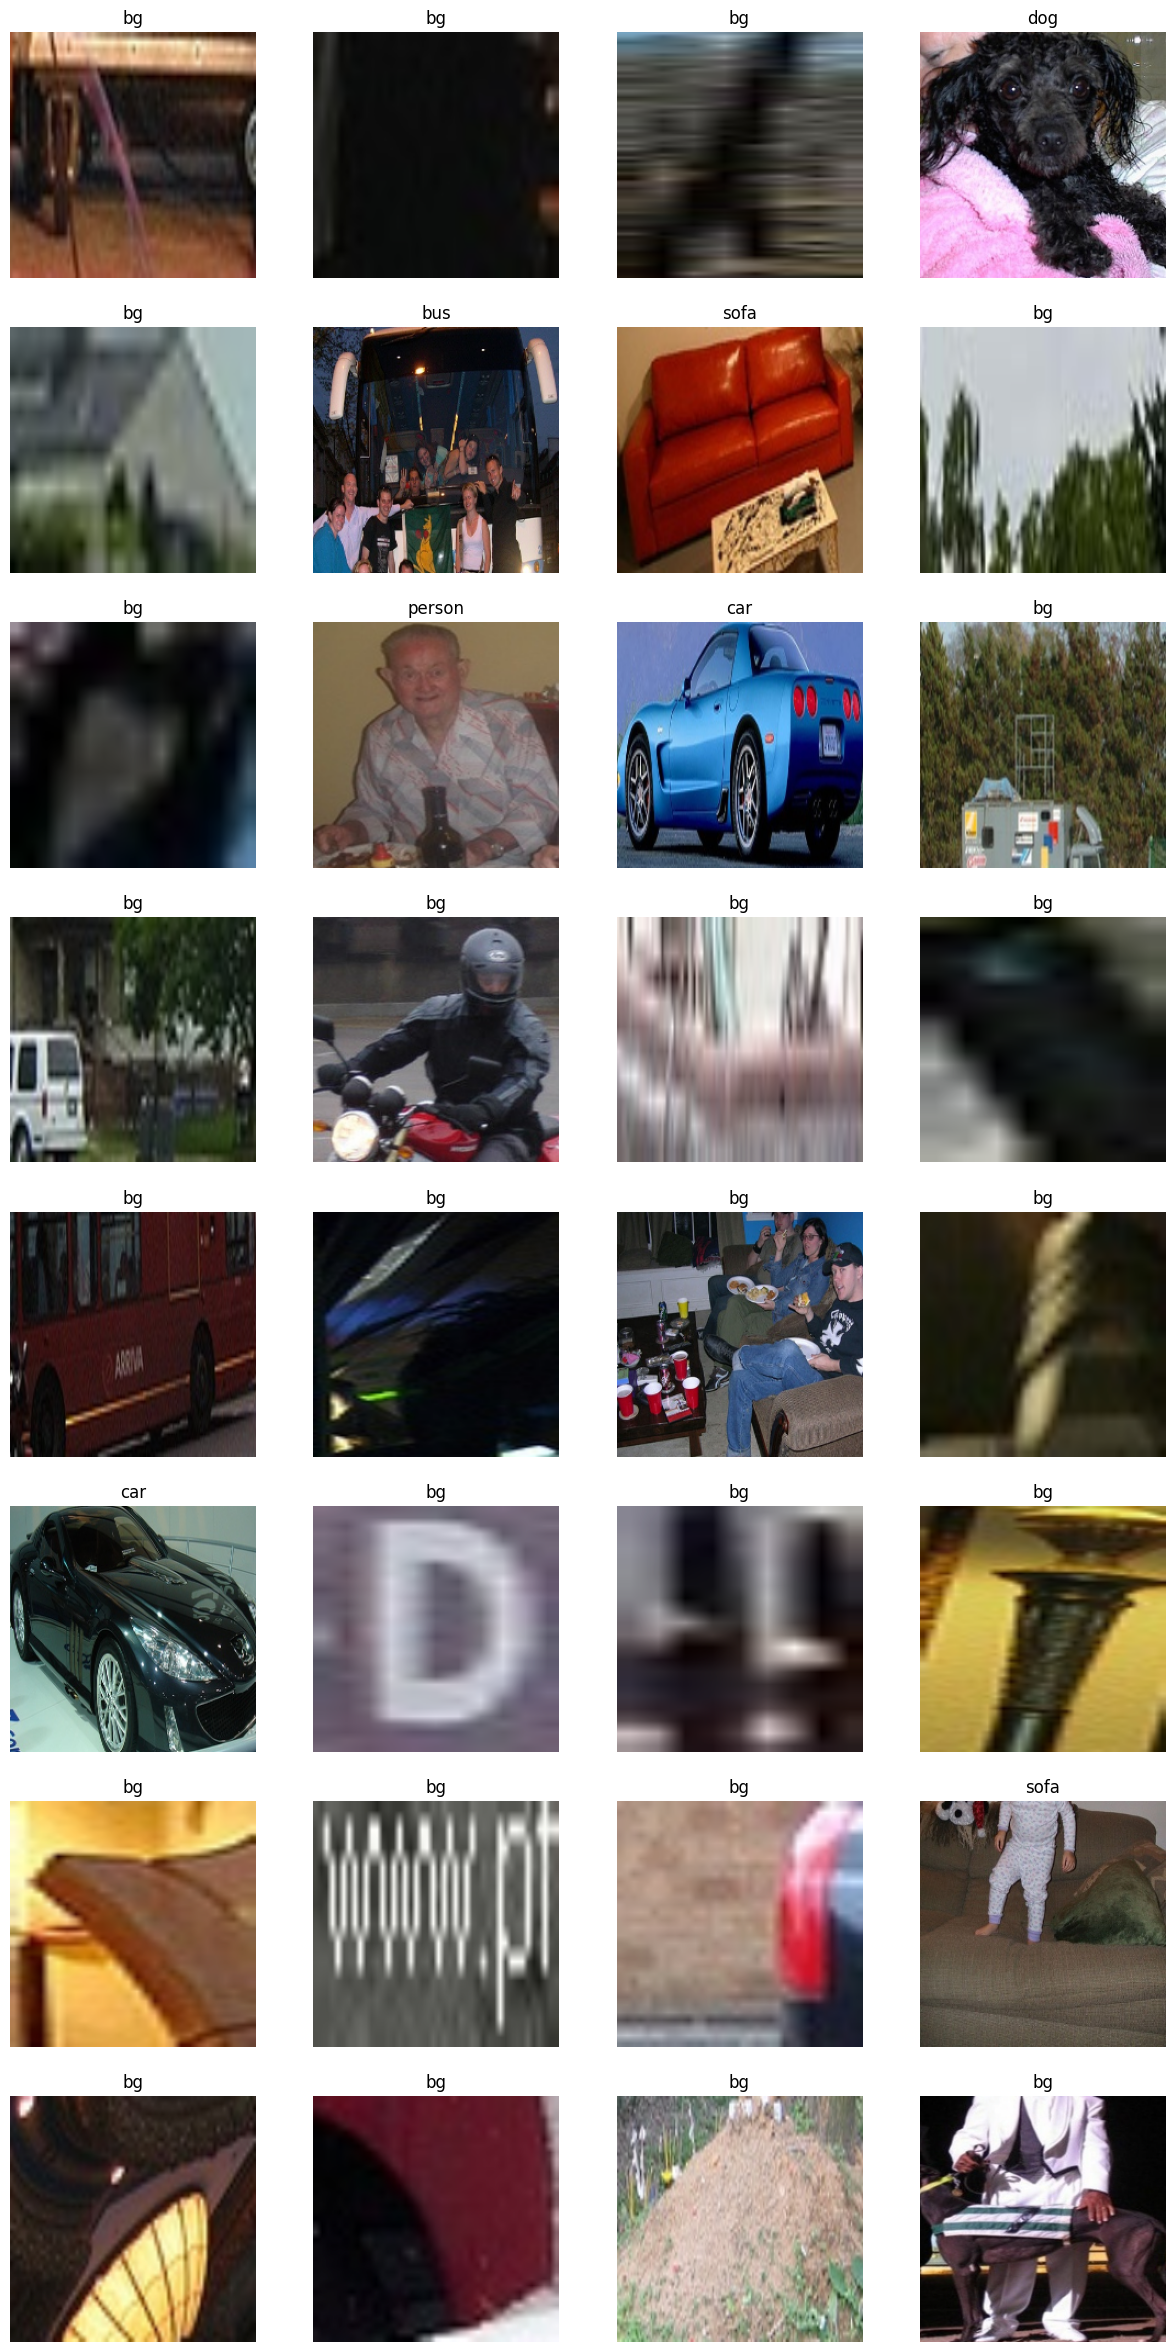

In [ ]:
inputs, labels = next(iter(train_loader))
labels = [idx_2_label[x.item()] for x in labels]
print("Train Batch")
imshow(inputs, labels, num_rows=8, num_cols=4)

Validation Batch


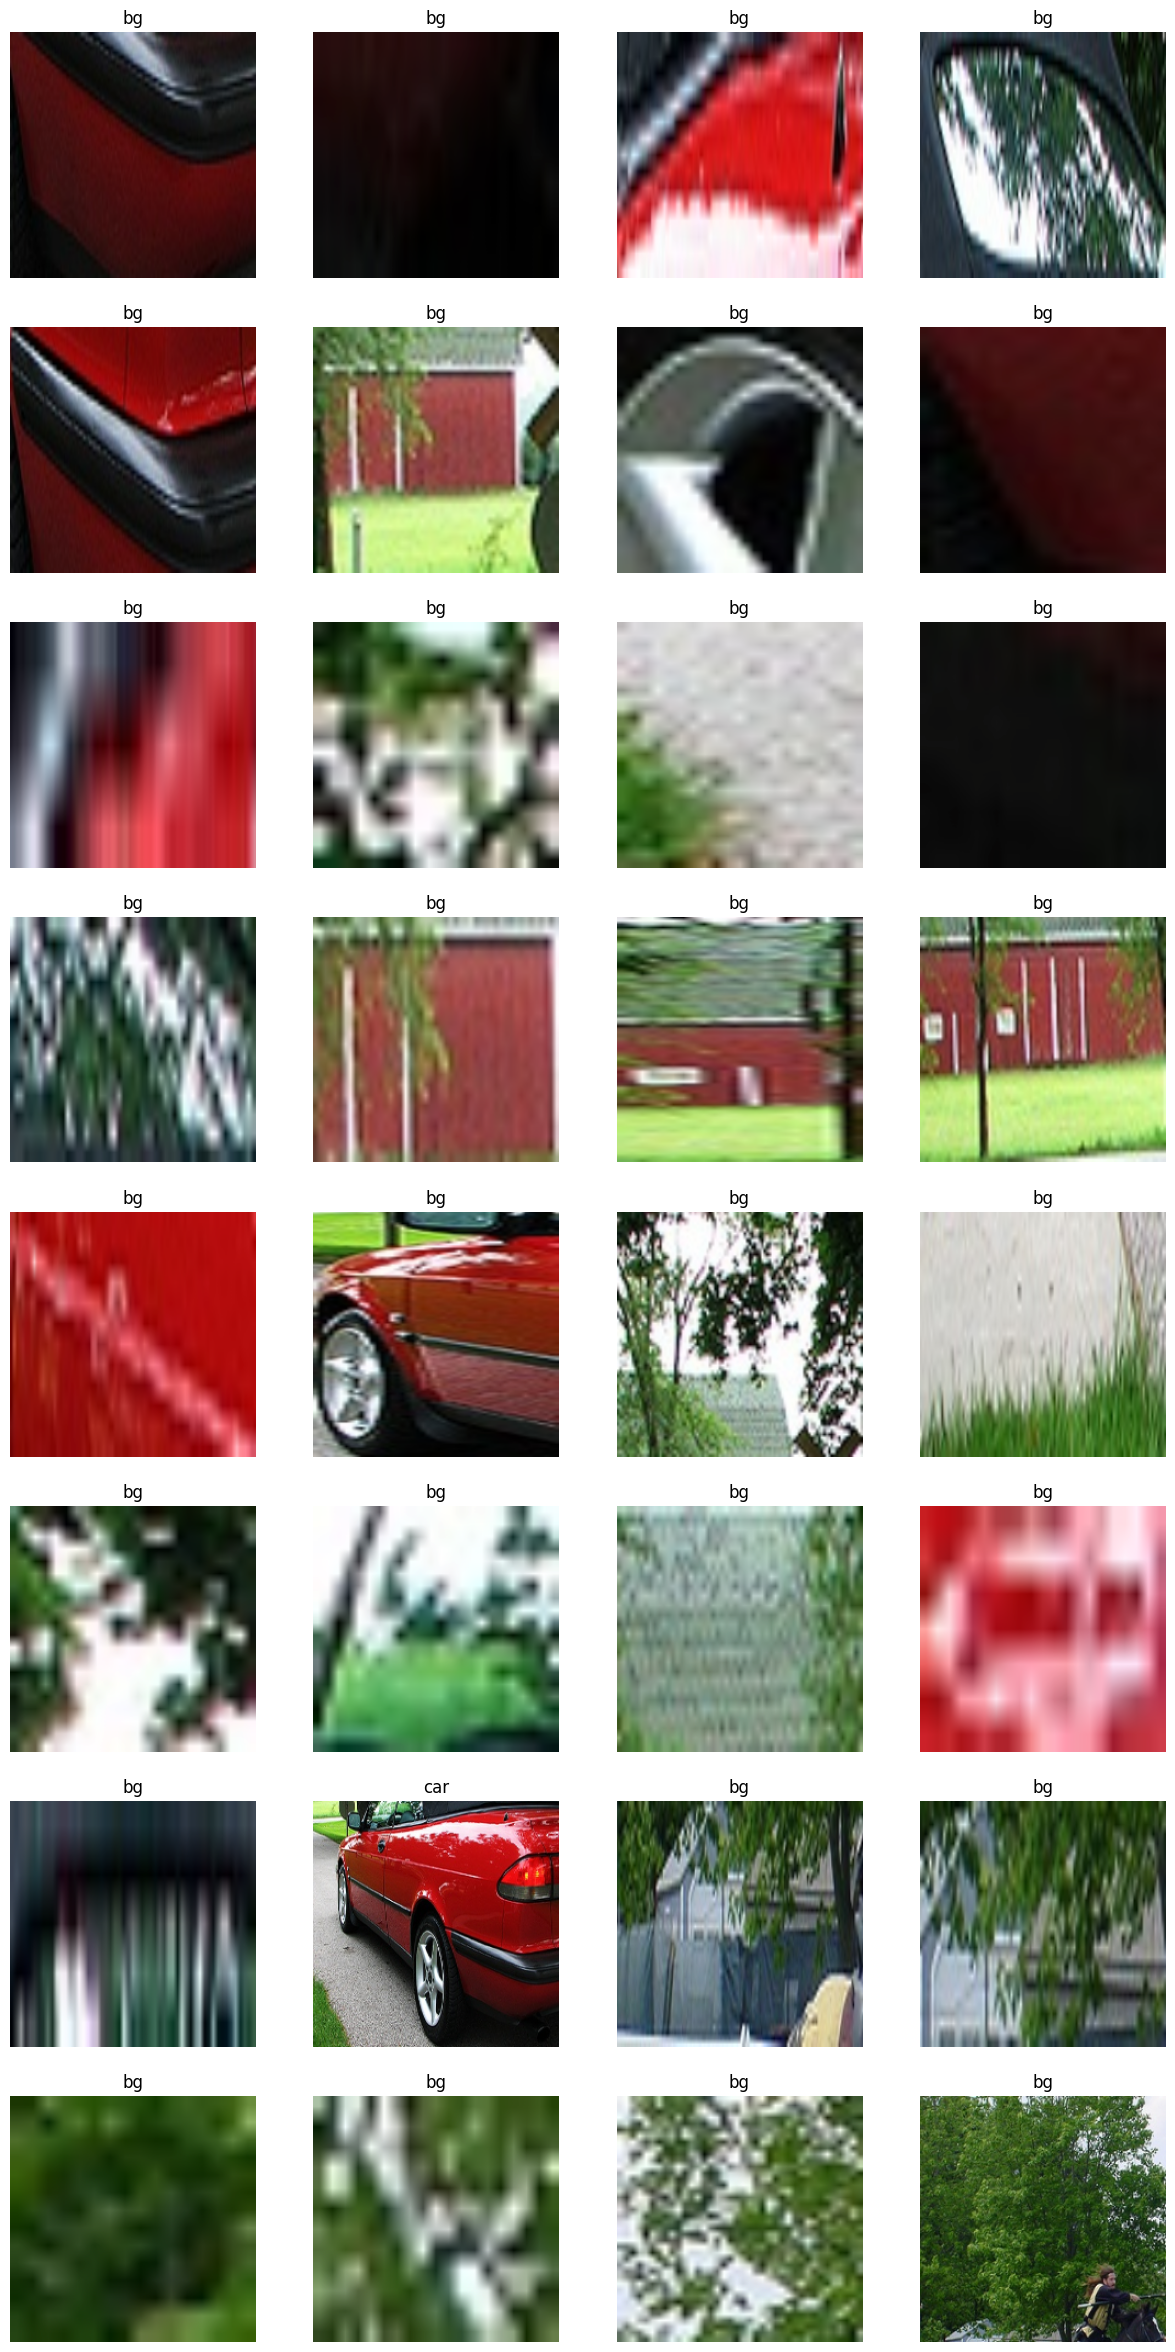

In [ ]:
inputs, labels = next(iter(val_loader))
labels = [idx_2_label[x.item()] for x in labels]
print("Validation Batch")
imshow(inputs, labels, num_rows=8, num_cols=4)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using Device: ", device)

Using Device:  cuda


In [ ]:
def build_model(backbone, num_classes):
    num_ftrs = backbone.fc.in_features
    # num_classes = number of class categories and +1 for background class
    backbone.fc = nn.Sequential(nn.Dropout(0.2),
                                nn.Linear(num_ftrs, 512),
                                nn.Dropout(0.2),
                                nn.Linear(512, num_classes+1))
    return backbone

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [ ]:
resnet_backbone = torchvision.models.resnet50(weights='IMAGENET1K_V2')
# freeze pretrained backbone
for param in resnet_backbone.parameters():
    param.requires_grad = False
model = build_model(backbone=resnet_backbone, num_classes=len(unique_class_labels))
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
class_weights = [1.0]+[2.0]*len(unique_class_labels) # 1 for bg and 2 for other classes
class_weights = torch.tensor(class_weights).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
num_epochs = 3
best_val_loss = 1000
epoch_train_losses = []
epoch_val_losses = []
train_accuracy = []
val_accuracy = []
count = 0
for idx in range(num_epochs):
    train_losses = []
    total_train = 0
    correct_train = 0
    model.train()
    for images, labels in tqdm(train_loader):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        pred = model(images)
        loss = criterion(pred, labels)
        predicted = torch.argmax(pred, 1)
        total_train += labels.shape[0]
        correct_train += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    epoch_train_loss = np.mean(train_losses)
    epoch_train_losses.append(epoch_train_loss)

    val_losses = []
    total_val = 0
    correct_val = 0
    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(val_loader):
            images = images.to(device)
            labels = labels.to(device)
            pred = model(images)
            loss = criterion(pred, labels)
            val_losses.append(loss.item())
            predicted = torch.argmax(pred, 1)
            total_val += labels.shape[0]
            correct_val += (predicted == labels).sum().item()

    accuracy_val = (100 * correct_val) / total_val
    val_accuracy.append(accuracy_val)
    epoch_val_loss = np.mean(val_losses)
    epoch_val_losses.append(epoch_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(idx + 1, num_epochs, epoch_train_loss, accuracy_train, epoch_val_loss, accuracy_val))


    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(idx + 1, epoch_val_loss))
        torch.save(model.state_dict(), "rcnn_modelnew.pt")
        count = 0
    else:
        count += 1

    if count == 5:
        break

  0%|          | 0/1481 [00:49<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# Define your test dataset and data loader
voc_dataset_test = torchvision.datasets.VOCDetection(root="content/voc",
                                                     image_set="test",
                                                     download=True,
                                                     year="2007")

test_loader = torch.utils.data.DataLoader(voc_dataset_test, batch_size=32, shuffle=False)

Using downloaded and verified file: content/voc/VOCtest_06-Nov-2007.tar
Extracting content/voc/VOCtest_06-Nov-2007.tar to content/voc


In [ ]:
model = torch.load('rcnn_model.pt')

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to calculate precision, recall, and mAP
def evaluate_model(model, test_loader):
    true_labels = []
    predicted_labels = []
    predicted_scores = []

    model.eval()
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)
            outputs = model(images)
            predicted_scores_batch, predicted_labels_batch = torch.max(outputs, dim=1)
            true_labels.append(targets.cpu().numpy())
            predicted_labels.append(predicted_labels_batch.cpu().numpy())
            predicted_scores.append(predicted_scores_batch.cpu().numpy())

    true_labels = np.concatenate(true_labels)
    predicted_labels = np.concatenate(predicted_labels)
    predicted_scores = np.concatenate(predicted_scores)

    # Compute precision-recall curve and AP for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predicted_scores[:, i])
        average_precision[i] = average_precision_score(true_labels[:, i], predicted_scores[:, i])

    # Compute macro-average precision-recall curve and AP
    precision_values = np.array(list(precision.values()))
    recall_values = np.array(list(recall.values()))
    precision["macro"] = np.mean(precision_values, axis=0)
    recall["macro"] = np.mean(recall_values, axis=0)
    average_precision["macro"] = average_precision_score(true_labels, predicted_scores, average="macro")

    # Plot precision-recall curve
    plt.plot(recall["macro"], precision["macro"], marker='o')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(False)
    plt.show()

    # Print mAP score
    print(f"Mean Average Precision (mAP): {average_precision['macro']:.4f}")

# Define other evaluation parameters (e.g., num_classes)
num_classes = 5  # Number of classes in the dataset

# Evaluate the model on the test dataset
evaluate_model(model, test_loader)
